In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/synthesisproject/anaconda3/envs/zeo_diffusion/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def check_nans(df):
    return f'Number of NaNs: {df.isna().sum()}'

def check_infs(df):
    return f'Number of Infs: {df.isin([np.inf, -np.inf]).sum()}'

In [3]:
df = pd.read_excel('ZEOSYN.xlsx').drop(columns = ['Unnamed: 0'])
df = df[~df['doi'].isna()] # keep only non-empty rows

High val: 400.00000000000006
Number of NaNs: 0
Number of Infs: 0


<Figure size 1080x504 with 0 Axes>

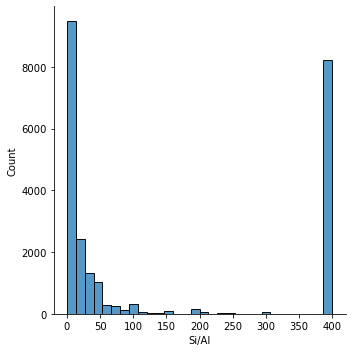

In [4]:
# Si/Al ratio
x, y = 'Si', 'Al'
ratio = f"{x}/{y}"
df[ratio] = df[x]/df[y]

# Fix NaNs from 0.0/0.0
idxs = df[df[ratio].isna()].index
for idx in idxs:
    df.loc[idx, ratio] = 0. # set to 0.0

# Fix infs
idxs = df[df[ratio] == np.inf].index # NaNs from 0.0/0.0
high_val = np.quantile(df[(df[ratio] != np.inf) & (df[ratio] != 0.)][ratio], 0.98)
print('High val:', high_val)
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 400.0

# Set upper limit
idxs = df[df[ratio] >= high_val].index # High values
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 400.0

print(check_nans(df[ratio]))
print(check_infs(df[ratio]))

plt.figure(figsize=(15,7))
sns.displot(df[ratio], bins=30) 
plt.show()

High val: 1.7179967159277212
Number of NaNs: 0
Number of Infs: 0


<Figure size 1080x504 with 0 Axes>

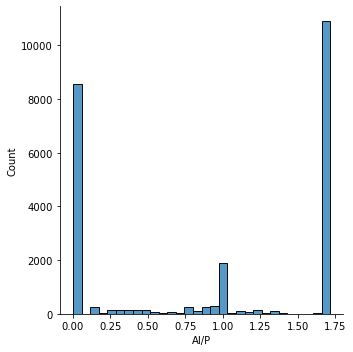

In [5]:
# Al/P ratio
x, y = 'Al', 'P'
ratio = f"{x}/{y}"
df[ratio] = df[x]/df[y]

# Fix NaNs from 0.0/0.0
idxs = df[df[ratio].isna()].index
for idx in idxs:
    df.loc[idx, ratio] = 0. # set to 0.0

# Fix infs
idxs = df[df[ratio] == np.inf].index # NaNs from 0.0/0.0
high_val = np.quantile(df[(df[ratio] != np.inf) & (df[ratio] != 0.)][ratio], 0.99)
print('High val:', high_val)
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 1.7

# Set upper limit
idxs = df[df[ratio] >= high_val].index # High values
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 1.7

print(check_nans(df[ratio]))
print(check_infs(df[ratio]))

plt.figure(figsize=(15,7))
sns.displot(df[ratio], bins=30) 
plt.show()

High val: 98.9999999999999
Number of NaNs: 0
Number of Infs: 0


<Figure size 1080x504 with 0 Axes>

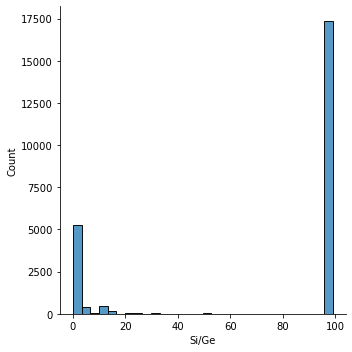

In [9]:
# Si/Ge ratio
x, y = 'Si', 'Ge'
ratio = f"{x}/{y}"
df[ratio] = df[x]/df[y]

# Fix NaNs from 0.0/0.0
idxs = df[df[ratio].isna()].index
for idx in idxs:
    df.loc[idx, ratio] = 0. # set to 0.0

# Fix infs
idxs = df[df[ratio] == np.inf].index # NaNs from 0.0/0.0
high_val = np.quantile(df[(df[ratio] != np.inf) & (df[ratio] != 0.)][ratio], 0.995)
print('High val:', high_val)
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 100.

# Set upper limit
idxs = df[df[ratio] >= high_val].index # High values
for idx in idxs:
    df.loc[idx, ratio] = high_val # set to about 100.

print(check_nans(df[ratio]))
print(check_infs(df[ratio]))

plt.figure(figsize=(15,7))
sns.displot(df[ratio], bins=30) 
plt.show()